# housing price prediction model

In [1]:
# importing module useful for ml 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Machine Learning: model selection and preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# using data from California Housing Dataset from sklearn module 
from sklearn.datasets import fetch_california_housing

# Loading the dataset
data = fetch_california_housing()

# Convert to DataFrame
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['Target'] = data.target

print(data.DESCR)
print(df.head())

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

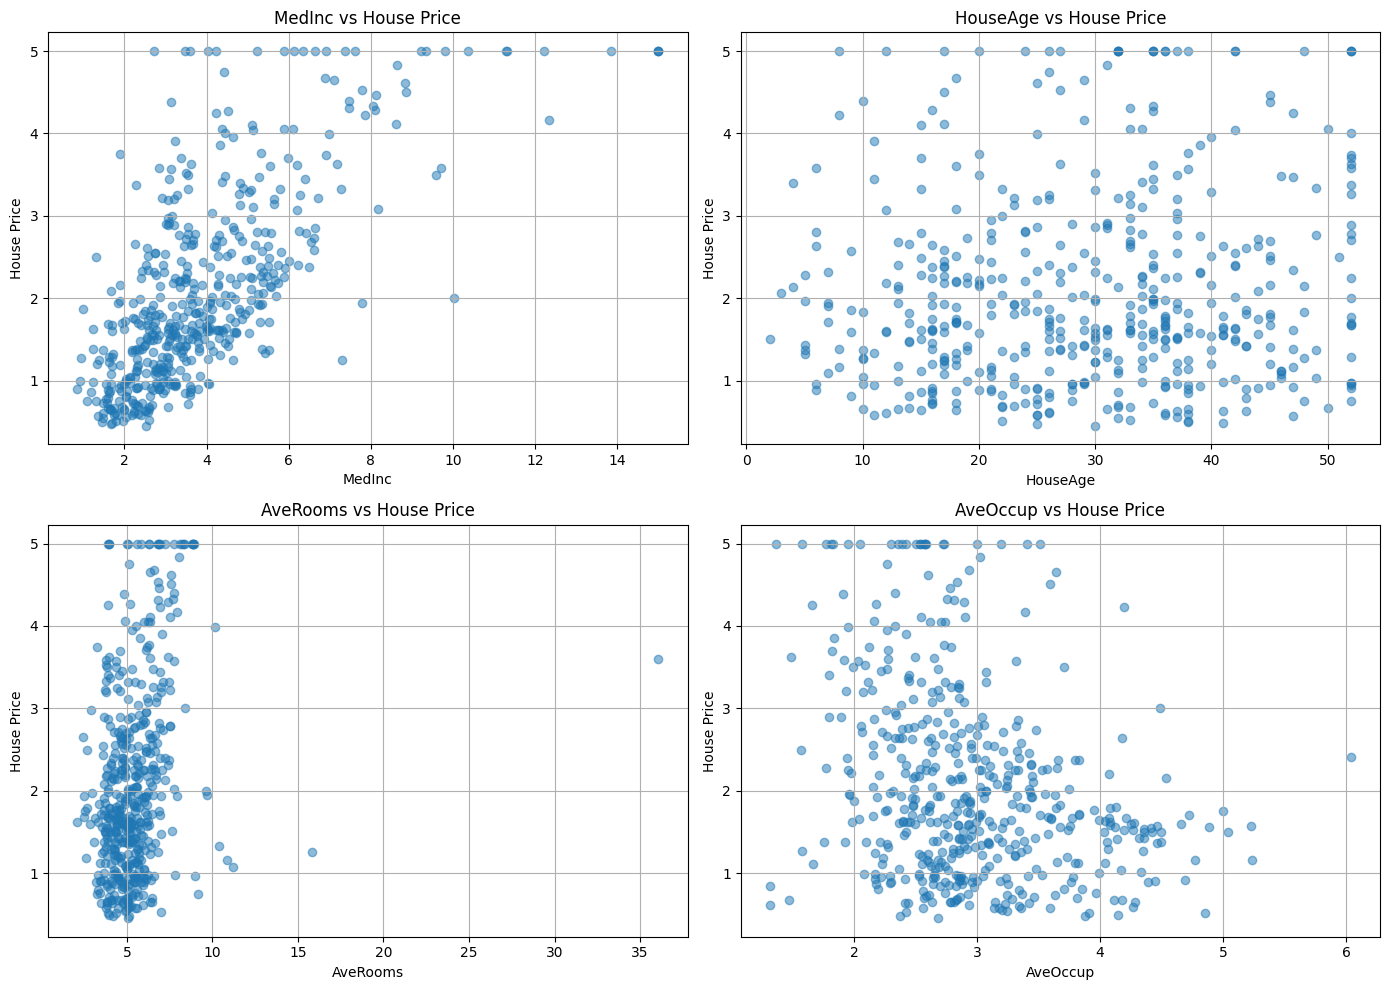

In [2]:
# visualizing data for better understanding
# Sample 500 random rows for cleaner plots
sample_df = df.sample(n=500, random_state=42)

features = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']

plt.figure(figsize=(14, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    plt.scatter(sample_df[feature], sample_df['Target'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('House Price')
    plt.title(f'{feature} vs House Price')
    plt.grid(True)

plt.tight_layout()
plt.show()



In [3]:

#using multiple linear regression model to predict house value 

# observing above data we came to conclusion that median income and average occupancy have linear behaviour with house price hence taking these
# 2 variable for model.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Selecting  two most linearly related features
X_selected = df[['MedInc', 'AveOccup']]
y = df['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Coefficients
coeff_df = pd.DataFrame({'Feature': X_selected.columns, 'Coefficient': model.coef_})
print(coeff_df)

R² Score: 0.459961725475556
MSE: 0.7076710035305551
    Feature  Coefficient
0    MedInc     0.419838
1  AveOccup    -0.003723


In [4]:
# taking input from user to predict house value
try:
   income = float(input("Enter the value (in units of $100,000): "))
   occupancy = float(input("Enter  Occupancy: "))

   # Create DataFrame with correct feature names
   user_input_df = pd.DataFrame([[income, occupancy]], columns=['MedInc', 'AveOccup'])

   # Predict
   predicted_price = model.predict(user_input_df)
   print(f"Predicted House Price: ${predicted_price[0] * 100000:.2f}")
except ValueError:
    print("Please enter valid numeric inputs.")
#taking input as 
#income = 20
# occupancy = 8

Enter the value (in units of $100,000):  20
Enter  Occupancy:  4


Predicted House Price: $883605.53
